In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [9]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 435.7 kB/s eta 0:00:38
   ---------------------------------------- 0.1/16.4 MB 544.7 kB/s eta 0:00:30
   ---------------------------------------- 0.1/16.4 MB 751.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/16.4 MB 774.0 kB/s eta 0:00:21
    --------------------------------------- 0.2/16.4 MB 919.0 kB/s eta 0:00:18
    --------------------------------------- 0.3/16.4 MB 927.4 kB/s eta 0:00:18
    --------------------------------------- 0.3/16.4 MB 999.0 kB/s eta 0:00:17
   - -------------------------------------- 0.4/16.4 MB 1.1 MB/s eta 0:00:15
   - -------------------------------------- 0.5/16.4 MB 1.2 MB/s eta 0:00:14
   - -------------------------------------- 0.6/16.4 MB 1.2 MB/s eta 0:00:1


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mysql.connector

In [4]:
!pip list | grep mysql


mysql-connector-python 9.3.0



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import mysql.connector

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ak4/7/2004',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Aman Kumar/OneDrive/Desktop/E-commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host= "localhost",
                          username= "root",
                          password= "Ak4/7/2004",
                          database= "ecommerce")

cur =db.cursor()


# List all unique cities where customers are located.

In [28]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [9]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)= 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders places in 2017 are" , data[0][0]

('total orders places in 2017 are', 90202)

# Find the total sales per category. 

In [14]:
query = """ select upper(products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,4053909.28
1,FURNITURE DECORATION,11441411.13
2,TELEPHONY,3895056.41
3,BED TABLE BATH,13700429.37
4,AUTOMOTIVE,6818354.65
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


# Calculate the percentage of orders that were paid in installments.

In [18]:
query = """ select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments
"""

cur.execute(query)

data = cur.fetchall()
"the percentage of orders that were paid in installments.", data[0][0]

('the percentage of orders that were paid in installments.',
 Decimal('99.9981'))

# Count the number of customers from each state. 

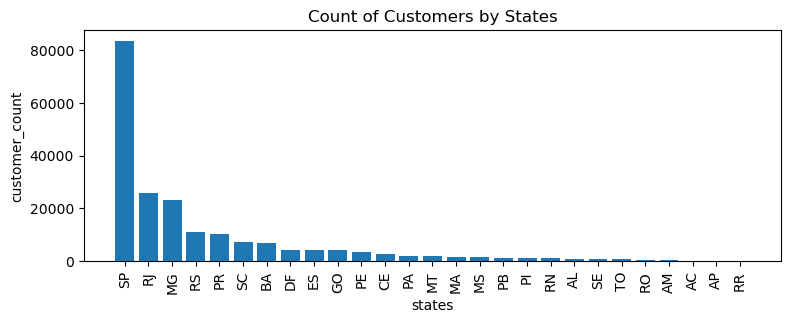

In [47]:
query = """ select customer_state , count(customer_id) 
from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["state","customer_count"])
df = df.sort_values(by ="customer_count", ascending= False)

plt.figure(figsize=(9,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation= 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Calculate the number of orders per month in 2018.

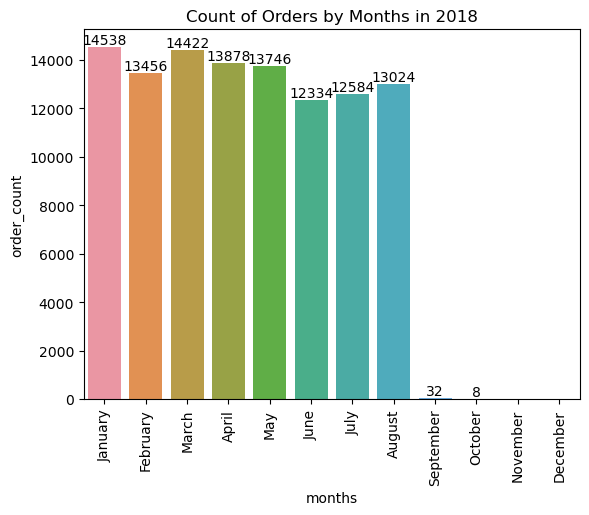

In [49]:
query = """ select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp) =2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","October","November","December"] 

ax=sns.barplot(x=df["months"],y=df["order_count"], data =df ,order =o)
plt.xticks(rotation =90)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")

plt.show()

# Find the average number of products per order, grouped by customer city.

In [53]:
query = """ with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id)as oc
from orders join order_items
on orders.order_id =order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns =["customer city","average Products/orders"])
df.head(10)

,customer city,average Products/orders
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


# Calculate the percentage of total revenue contributed by each product category.

In [59]:
query = """ select upper(products.product_category) category, round((sum(payments.payment_value))/(select sum(payment_value) from payments)*100, 2) sales_percentage
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
"""

cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data,columns =["Category","percentage distribution"])
df.head(5)

,Category,percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


# Identify the correlation between product price and the number of times a product has been purchased.

In [70]:
import numpy as np
query = """ select products.product_category , count(order_items.product_id), round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category
"""
cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data,columns =["Category","order_count","price"])

arr1= df["order_count"]
arr2= df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation between product price and the number of times a product has been purchased is" ,a[0][1])

the correlation between product price and the number of times a product has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.


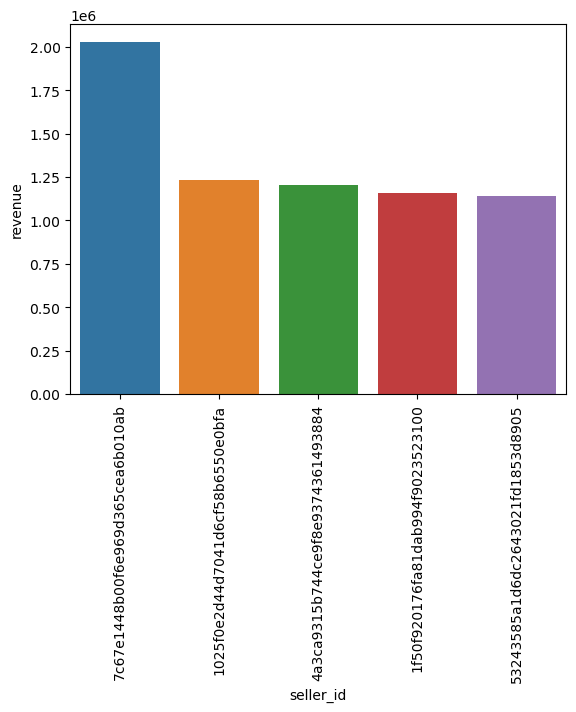

In [79]:
query =""" select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments 
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""
cur.execute(query)

data = cur.fetchall()
df= pd.DataFrame(data, columns=["seller_id","revenue","rank"])
df=df.head()
sns.barplot(x="seller_id", y="revenue", data=df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [84]:
query =""" select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["customer_id","timestamp","prize", "moving_avg"])
df

,customer_id,timestamp,prize,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# calculate the cumulative sales per month for each year.

In [88]:
query =""" select years, months, payment , sum(payment)
over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years ,months) as a
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["Years","Months","Payments","Cumulative_sales"])
df

,Years,Months,Payments,Cumulative_sales
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# Calculate the year-over-year growth rate of total sales.

In [95]:
query =""" with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years,  ((payment - lag(payment,1) over(order by years))/lag(payment,1) over(order by years))*100 previous_year from a
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["Years","yoy % growth"])
df

,Years,yoy % growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924



# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.



In [101]:
query =""" with a as(select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id 
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order,interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;
"""
cur.execute(query)

data = cur.fetchall()
data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

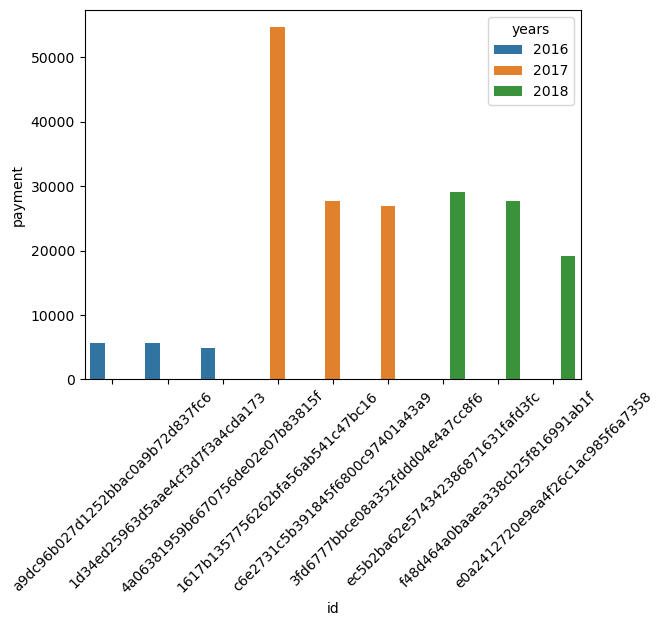

In [113]:
query=""" select years, customer_id,payment,d_rank
from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3 ;"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["years","id","payment","rank"])
df["years"] = df["years"].astype(str)
plt.xticks(rotation =45)
sns.barplot(x ="id",y="payment",data= df, hue ="years")
plt.show()